In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20, 10)

In [2]:
with open("data/day8") as myfile:
    tree = myfile.read()
trees = tree.split("\n")

In [3]:
allTrees = []
for tree in trees:
    allTrees.append([x for x in tree])
allTrees = np.array(allTrees).astype(float)
x, y = np.shape(allTrees)
print(x, y)

99 99


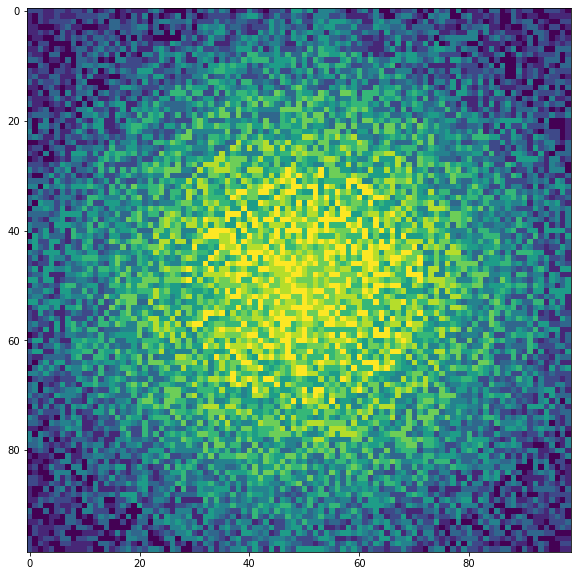

In [4]:
plt.imshow(allTrees)

In [5]:
# First pass for the highest trees

In [6]:

ROWS = []
for k in range(x):
    a = allTrees[k].flatten().tolist()
    HighestTrees = np.flatnonzero(a == np.max(a))
    MIN, MAX = HighestTrees[0],HighestTrees[-1]
    row = np.zeros(x)
    row[MIN] = 1
    row[MAX] = 1
    ROWS.append(row)

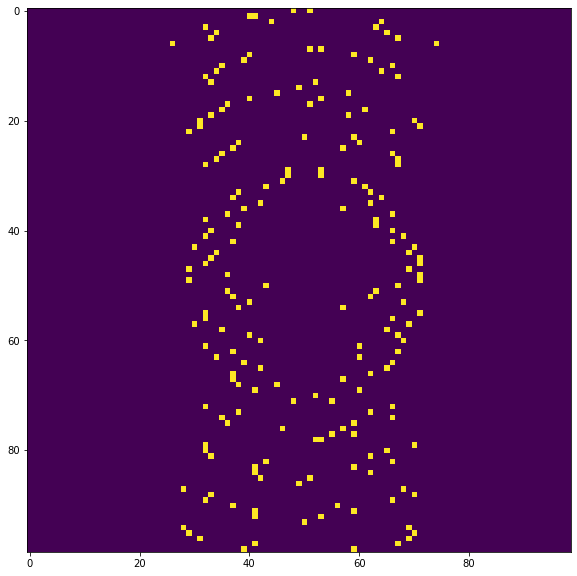

In [7]:
plt.imshow(ROWS)

In [8]:
COLS = []
for k in range(x):
    a = allTrees[:,k].flatten().tolist()
    HighestTrees = np.flatnonzero(a == np.max(a))
    MIN, MAX = HighestTrees[0],HighestTrees[-1]
    row = np.zeros(x)
    row[MIN] = 1
    row[MAX] = 1
    COLS.append(row)

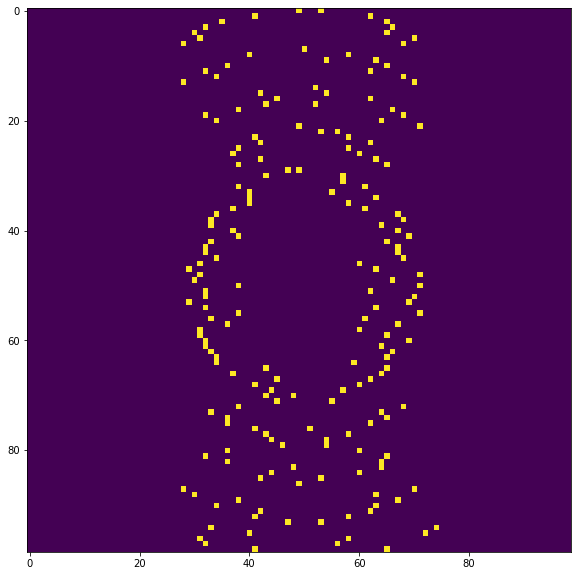

In [9]:
plt.imshow(COLS)

## Take number 2

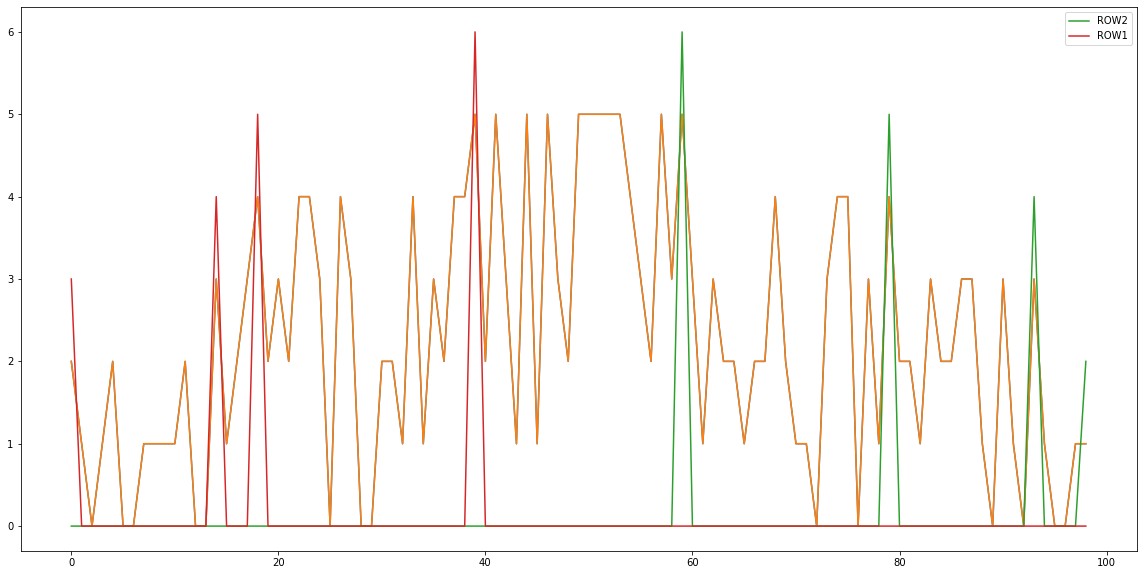

In [10]:
ROWS1 = []
for X in range(x):
    a = allTrees[X].flatten().tolist()
    row = np.zeros(x)
    MAX = 0
    for Y in range(y):
        if Y == 0:
            row[Y] = a[Y]+1
            MAX = a[Y]            
        elif a[Y] > MAX:
            row[Y] = a[Y]+1
            MAX = a[Y]

    ROWS1.append(row)
    
ROWS2 = []
for X in range(x):
    a2 = allTrees[X].flatten().tolist()[::-1]
    row2 = np.zeros(x)
    MAX = 0
    for Y in range(y):
        if Y == 0:
            row2[Y] = a2[Y]+1
            MAX = a2[Y]            
        elif a2[Y] > MAX:
            row2[Y] = a2[Y]+1
            MAX = a2[Y]
    ROWS2.append(row2[::-1]) 
    
plt.plot(range(x),a2[::-1])
plt.plot(range(x),a)
plt.plot(range(x),row2[::-1],label="ROW2")
plt.plot(range(x),row,label="ROW1")
plt.legend()

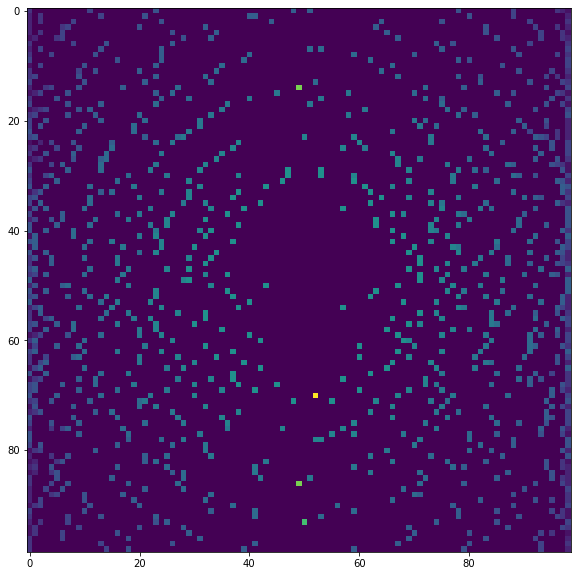

In [11]:
xarray = np.add(ROWS1,ROWS2)
plt.imshow(xarray)

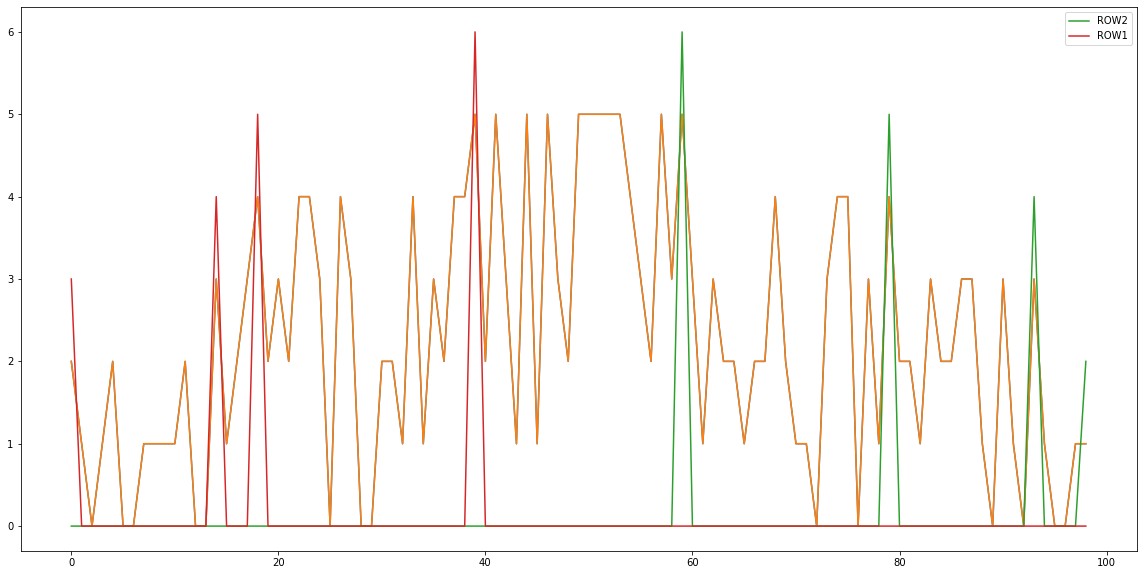

In [12]:
ROWS1 = []
for X in range(x):
    a = allTrees[X].flatten().tolist()
    row = np.zeros(x)
    MAX = 0
    for Y in range(y):
        if Y == 0:
            row[Y] = a[Y]+1
            MAX = a[Y]            
        elif a[Y] > MAX:
            row[Y] = a[Y]+1
            MAX = a[Y]

    ROWS1.append(row)
    
ROWS2 = []
for X in range(x):
    a2 = allTrees[X].flatten().tolist()[::-1]
    row2 = np.zeros(x)
    MAX = 0
    for Y in range(y):
        if Y == 0:
            row2[Y] = a2[Y]+1
            MAX = a2[Y]            
        elif a2[Y] > MAX:
            row2[Y] = a2[Y]+1
            MAX = a2[Y]
    ROWS2.append(row2[::-1]) 
    
plt.plot(range(x),a2[::-1])
plt.plot(range(x),a)
plt.plot(range(x),row2[::-1],label="ROW2")
plt.plot(range(x),row,label="ROW1")
plt.legend()

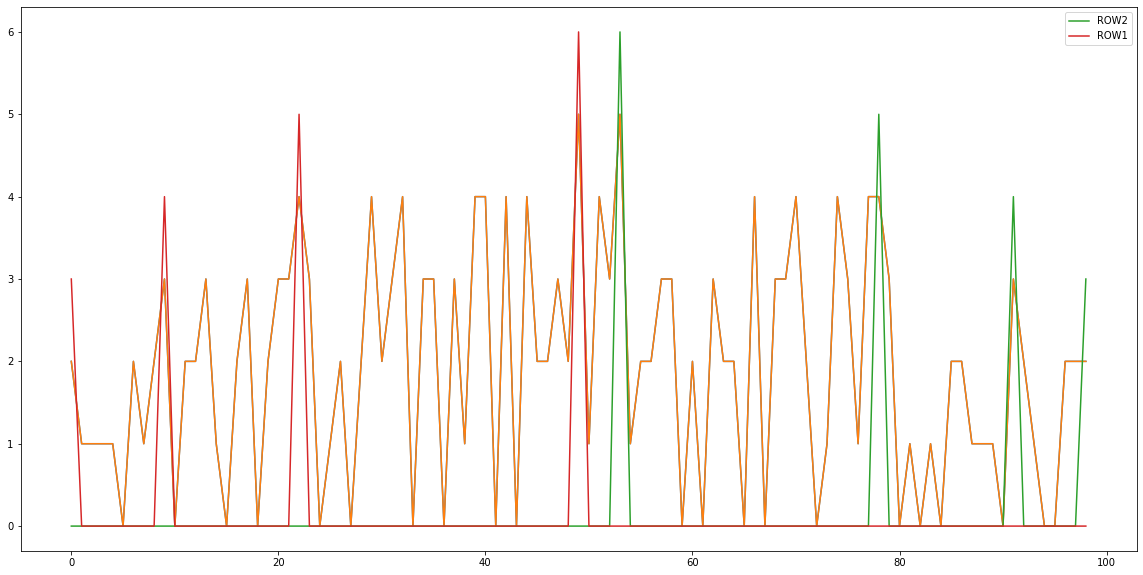

In [13]:
ROWS3 = []
for X in range(x):
    a = np.rot90(allTrees)[X].flatten().tolist()
    row = np.zeros(x)
    MAX = 0
    for Y in range(y):
        if Y == 0:
            row[Y] = a[Y]+1
            MAX = a[Y]            
        elif a[Y] > MAX:
            row[Y] = a[Y]+1
            MAX = a[Y]

    ROWS3.append(row)
    
ROWS4 = []
for X in range(x):
    a2 = np.rot90(allTrees)[X].flatten().tolist()[::-1]
    row2 = np.zeros(x)
    MAX = 0
    for Y in range(y):
        if Y == 0:
            row2[Y] = a2[Y]+1
            MAX = a2[Y]            
        elif a2[Y] > MAX:
            row2[Y] = a2[Y]+1
            MAX = a2[Y]
    ROWS4.append(row2[::-1]) 
plt.plot(range(x),a2[::-1])
plt.plot(range(x),a)
plt.plot(range(x),row2[::-1],label="ROW2")
plt.plot(range(x),row,label="ROW1")
plt.legend()

2126
1798


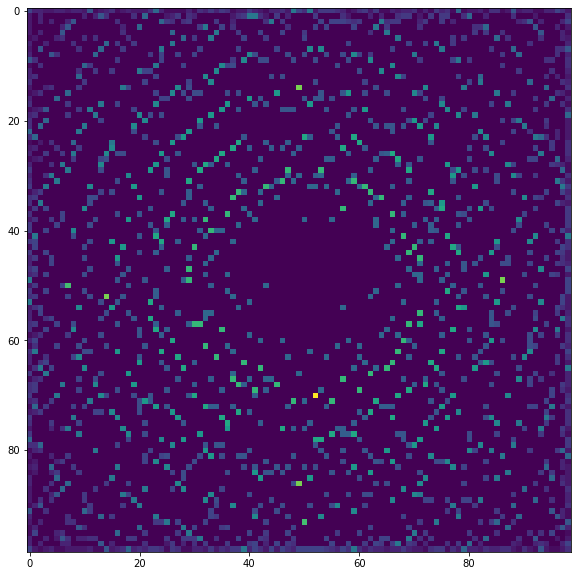

In [14]:

yarray = np.add(ROWS3,ROWS4)
MAP = np.add(xarray,np.rot90(yarray,k=1))
print(np.count_nonzero(MAP)) #nop: 1948
MAP = np.add(xarray,np.rot90(yarray,k=3))
print(np.count_nonzero(MAP)) # 1864 too high
plt.imshow(MAP)

C:\Users\JON80843\AppData\Local\Temp/ipykernel_30336/1428229520.py:2: RuntimeWarning: invalid value encountered in floor_divide
  MAP = MAP//MAP+0


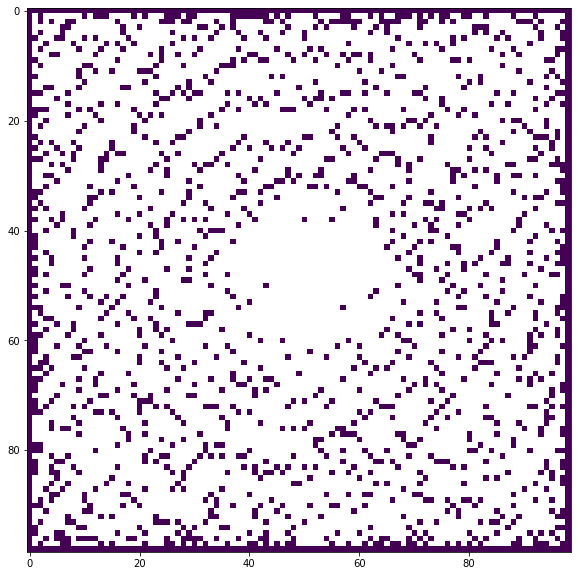

In [15]:
MAP = np.add(xarray,np.rot90(yarray,k=3))
MAP = MAP//MAP+0
plt.imshow(MAP)

## Finding trees with view

In [53]:
locatorMap = np.zeros(np.shape(allTrees))
locatorMapScores = dict()

In [39]:
def getTrees(row,ix,details=False):
    there = row[ix]
    droite = row[(ix+1):]
    droite = [x if (x <= there) else there  for x in droite  ]
    gauche = row[:ix]
    gauche = [x if (x <= there) else there  for x in gauche  ]
    if len(droite):
        A = np.argmax(droite)+1
    else:
        A = 0
    if details:
        print(there)
        print("A droite")
        print("LEN:",len(droite),droite)
        print("SCore I: ",A)

    if len(gauche):
        B = np.argmax(gauche[::-1])  +1     
    else:
        B = 0
          
    if details:
        print(there)
        print("A gauche")
        print("LEN:",len(gauche),gauche[::-1])
        print("Score II: ",B)

    return A, B

In [46]:
def getScore(x,y,details=False):
    there = allTrees[x,y]
    row = allTrees[x]
    A, B = getTrees(row,y,details=details)
    col = allTrees[:,y]
    C, D = getTrees(col,x,details=details)
    score = A*B*C*D
    return score, [A,B,C,D]

In [59]:
score, [A,B,C,D] = getScore(62,37,details=True)
print(score)
[A,B,C,D]

9.0
A droite
LEN: 61 [8.0, 7.0, 5.0, 8.0, 8.0, 6.0, 8.0, 6.0, 7.0, 9.0, 6.0, 7.0, 7.0, 9.0, 6.0, 7.0, 6.0, 6.0, 7.0, 9.0, 6.0, 5.0, 6.0, 8.0, 6.0, 5.0, 8.0, 7.0, 9.0, 9.0, 7.0, 4.0, 6.0, 7.0, 5.0, 5.0, 8.0, 8.0, 5.0, 7.0, 7.0, 5.0, 5.0, 6.0, 7.0, 6.0, 3.0, 5.0, 3.0, 5.0, 6.0, 3.0, 2.0, 6.0, 1.0, 5.0, 1.0, 2.0, 2.0, 1.0, 5.0]
SCore I:  10
9.0
A gauche
LEN: 37 [6.0, 5.0, 5.0, 6.0, 6.0, 4.0, 7.0, 4.0, 4.0, 4.0, 5.0, 4.0, 8.0, 6.0, 6.0, 4.0, 4.0, 5.0, 6.0, 4.0, 7.0, 5.0, 5.0, 6.0, 2.0, 6.0, 6.0, 5.0, 5.0, 4.0, 3.0, 4.0, 1.0, 1.0, 5.0, 5.0, 3.0]
Score II:  13
9.0
A droite
LEN: 36 [5.0, 7.0, 7.0, 9.0, 9.0, 8.0, 5.0, 6.0, 7.0, 8.0, 6.0, 6.0, 4.0, 6.0, 3.0, 4.0, 6.0, 3.0, 6.0, 4.0, 3.0, 5.0, 6.0, 3.0, 2.0, 6.0, 4.0, 6.0, 2.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0]
SCore I:  4
9.0
A gauche
LEN: 62 [8.0, 5.0, 7.0, 8.0, 6.0, 7.0, 8.0, 6.0, 6.0, 9.0, 6.0, 7.0, 8.0, 8.0, 6.0, 8.0, 6.0, 9.0, 8.0, 9.0, 9.0, 8.0, 5.0, 5.0, 9.0, 5.0, 5.0, 9.0, 7.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 6.0, 8.0, 3.0, 4.0, 3.0, 4.0

[10, 13, 4, 10]

In [58]:
for x in range(np.shape(locatorMap)[0]):
    for y in range(np.shape(locatorMap)[1]):
        locatorMap[x][y],locatorMapScores[(x,y)] = getScore(x,y)
        if locatorMap[x][y] == 5200.0:
            print(x,y)

62 37


In [57]:
for k in locatorMapScores:
    if 
        print(k)

#### Best view

Score max: 5200.0


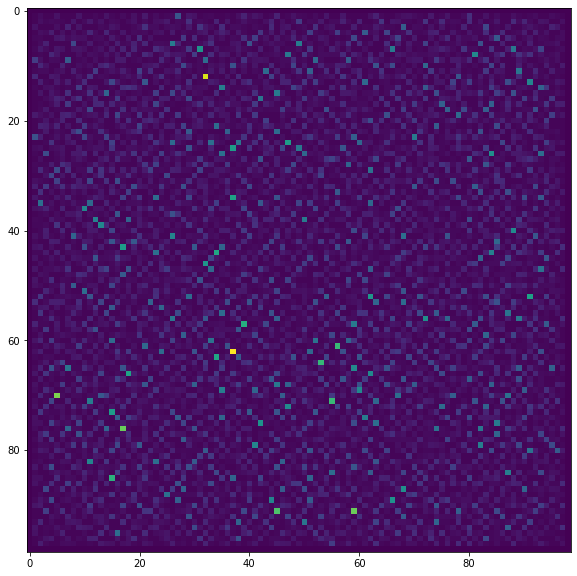

In [56]:
print("Score max:", np.max(locatorMap))
#256 is too low
# 2320164.0 too high
# 41616 si not correct
plt.imshow(np.sqrt(locatorMap))

Score max: 5200.0


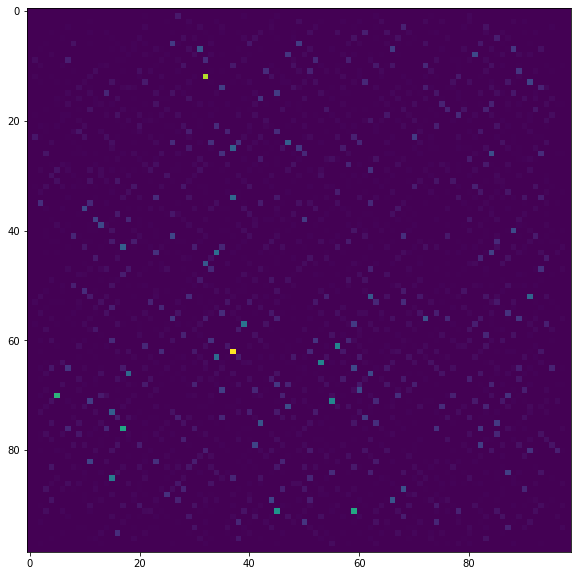

In [44]:
print("Score max:", np.max(locatorMap))
plt.imshow(locatorMap)

In [45]:
5200.0**(1/4)

8.491821094987799